In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [18]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
date_recent = engine.execute('SELECT * FROM Measurement Order by date DESC LIMIT 1').fetchall()[0].date
date_recent

'2017-08-23'

2017-08-23 00:00:00
2016-08-23 00:00:00


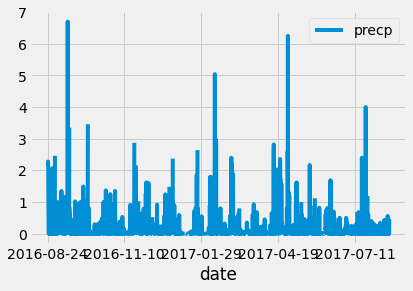

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_date = last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

#Convert last date string to date

last_date=dt.datetime.strptime(last_date, "%Y-%m-%d")

#Calculate date one year after last date using timedelta datetime function
first_date = last_date - dt.timedelta(days=365)

print(last_date)
print(first_date)

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year_data, columns=['date', 'precp'])
last_year_df.set_index(last_year_df['date'], inplace=True)

# Sort the dataframe by date
last_year_df = last_year_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
#print(last_year_data)

last_year_df.plot()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_df.describe()

,precp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(func.count(Station.station)).all()[0][0]
print(number_stations)

9


In [42]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(station_active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_active[0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station[0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_active_year = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station[0]).filter(Measurement.date >= first_date).all()

temps_df = pd.DataFrame(station_active_year, columns=['tobs'])
#last_year_df.set_index(last_year_df['date'], inplace=True)

temps_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


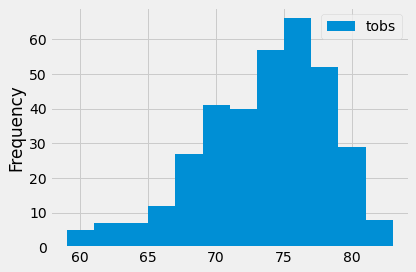

In [51]:
top_station_obs =fffffffot.hist(bins=12)
plt.tight_layout()

# Close session

In [16]:
# Close Session
session.close()